# Breast tumor data (10x Genomics data)

Here you find the code to reproduce the analysis on breast tumor single cell data publicly available on [10x Genomics website](https://support.10xgenomics.com/single-cell-dna/datasets) (Breast Tumor Tissue Dataset).


## Input Data
PhyliCS takes properly formatted CNV calls (see [Input data format](https://github.com/bioinformatics-polito/PhyliCS#input-data-format)) as input data. [Here](https://github.com/bioinformatics-polito/PhyliCS_usage/tree/main/data/breast) you can find he CNV calls computed from the .bam files using [Ginkgo],(https://www.nature.com/articles/nmeth.3578) which are used to perform the current analysis.

**You can skip this section if you are interested in reproducing the results shown in the paper.**

To reproduce those files you should, first, download the multi-cell allignment files (.bam) and sample summary files (.csv) from 10x Genomics website:

```
wget -O data/breastA/possorted_bam.bam http://s3-us-west-2.amazonaws.com/10x.files/samples/cell-dna/1.1.0/breast_tissue_A_2k/breast_tissue_A_2k_possorted_bam.bam
wget -O data/breastA/per_cell_summary_metrics.csv http://cf.10xgenomics.com/samples/cell-dna/1.1.0/breast_tissue_A_2k/breast_tissue_A_2k_per_cell_summary_metrics.csv

```

Then you should install and use [SCtools](https://github.com/bioinformatics-polito/SCTools) to demultiplex the .bam file into single-cell allignments files:

```
sctools_demultiplex --barcodes-csv data/breastA/per_cell_summary_metrics.csv --forbidden-tags XA,SA --min-mapq 30 --bed -o {outdir} data/breastA/possorted_bam.bam

```

After that you can run Ginkgo, with its default options, using GrCh38, as reference genome, divided into variable size bins (medium bin size = 500kbp). Refer to the Ginkgo documentation for additional details.  

If you wish, you may use CNV calls computed with any other callers, as long as they are provided in the correct format.

## Data Preprocessing

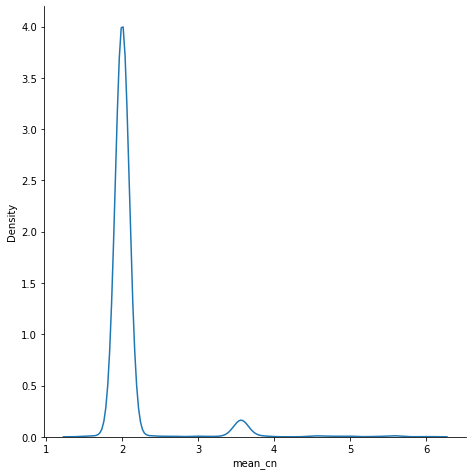

In [5]:
import phylics
import pandas as pd

# section A
breast_a = phylics.Sample.from_file("data/breast/breastA/SegCopy", sample_name="S_A")
df = pd.read_csv("data/breast/breastA/results.txt", sep="\t", index_col=0).dropna()
ploidy = df['Copy_Number']
breast_a.mad()
breast_a.add_annotation(ploidy, "mean_cn")
breast_a.plot_annotation_dist("mean_cn", kind="kde", figsize=(7,7))

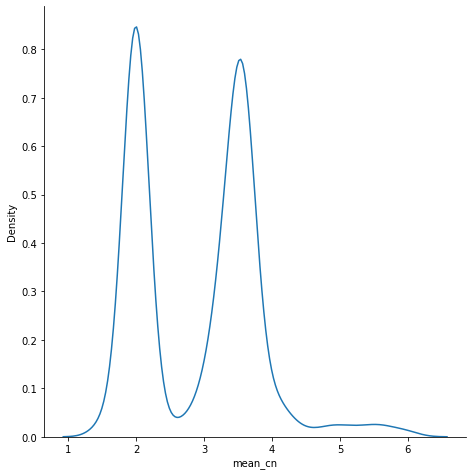

In [10]:
breast_a = breast_a.filter("mean_cn", "out_eq", (1.5, 3))
breast_a = breast_a.filter("mad", "lt_eq", 0.95, percentile=True)

#section B
breast_b = phylics.Sample.from_file("data/breast/breastB/SegCopy", sample_name="S_B")
df = pd.read_csv("data/breast/breastB/results.txt", sep="\t", index_col=0).dropna()
ploidy = df['Copy_Number']
breast_b.mad()
breast_b.add_annotation(ploidy, "mean_cn")
breast_b.plot_annotation_dist("mean_cn", kind="kde", figsize=(7,7))

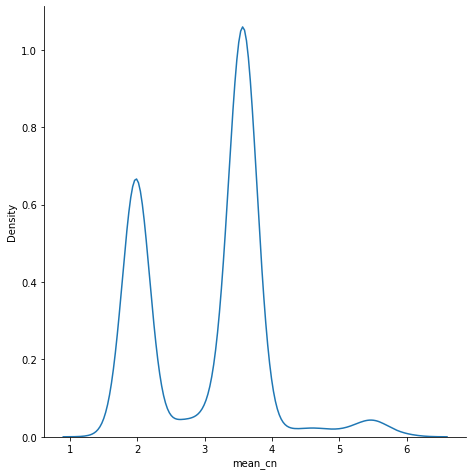

In [11]:
breast_b = breast_b.filter("mean_cn", "out_eq", (1.5, 3))
breast_b = breast_b.filter("mad", "lt_eq", 0.95, percentile=True)

#section C
breast_c = phylics.Sample.from_file("data/breast/breastC/SegCopy", sample_name="S_C")
df = pd.read_csv("data/breast/breastC/results.txt", sep="\t", index_col=0).dropna()
ploidy = df['Copy_Number']
breast_c.mad()
breast_c.add_annotation(ploidy, "mean_cn")
breast_c.plot_annotation_dist("mean_cn", kind="kde", figsize=(7,7))

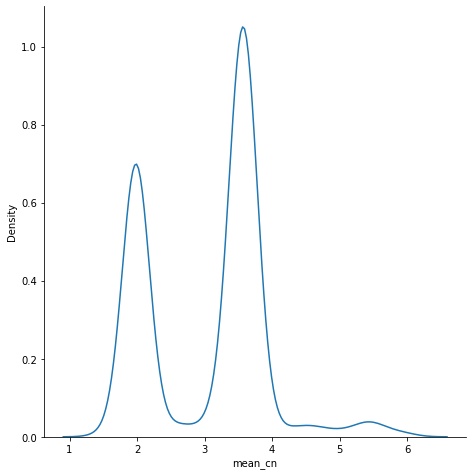

In [12]:
breast_c = breast_c.filter("mean_cn", "out_eq", (1.5, 3))
breast_c = breast_c.filter("mad", "lt_eq", 0.95, percentile=True)

#section D
breast_d = phylics.Sample.from_file("data/breast/breastD/SegCopy", sample_name="S_D")
df = pd.read_csv("data/breast/breastD/results.txt", sep="\t", index_col=0).dropna()
ploidy = df['Copy_Number']
breast_d.mad()
breast_d.add_annotation(ploidy, "mean_cn")
breast_d.plot_annotation_dist("mean_cn", kind="kde", figsize=(7,7))

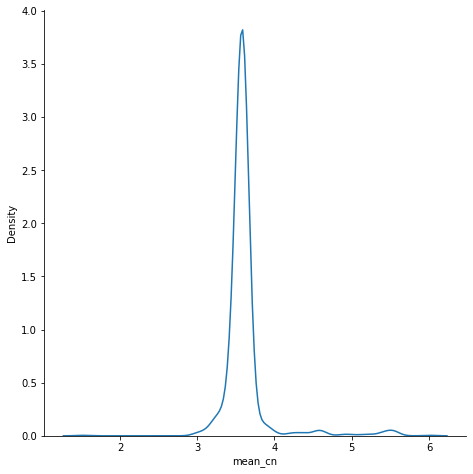

In [13]:
breast_d = breast_d.filter("mean_cn", "out_eq", (1.5, 3))
breast_d = breast_d.filter("mad", "lt_eq", 0.95, percentile=True)

#section E
breast_e = phylics.Sample.from_file("data/breast/breastE/SegCopy", sample_name="S_E")
df = pd.read_csv("data/breast/breastE/results.txt", sep="\t", index_col=0).dropna()
ploidy = df['Copy_Number']
breast_e.mad()
breast_e.add_annotation(ploidy, "mean_cn")
breast_d.plot_annotation_dist("mean_cn", kind="kde", figsize=(7,7))

In [14]:
breast_e = breast_e.filter("mean_cn", "out_eq", (1.5, 3))
breast_e = breast_e.filter("mad", "lt_eq", 0.95, percentile=True)

## Spatial Heterogeneity evaluation: SHscore

In [19]:
ss = phylics.MultiSample.from_list(breast_b, breast_c, breast_d, breast_e)
sh_scores = ss.SHscore(n_jobs=10)
sh_scores

,samples_partition,score
0,"[[S_C, S_D, S_E], [S_B]]",0.182388
1,"[[S_B, S_D, S_E], [S_C]]",0.001241
2,"[[S_D, S_E], [S_B, S_C]]",0.082600
3,"[[S_D, S_E], [S_C], [S_B]]",0.022122
4,"[[S_B, S_C, S_E], [S_D]]",-0.015041
5,"[[S_C, S_E], [S_B, S_D]]",0.063741
6,"[[S_C, S_E], [S_D], [S_B]]",0.004464
7,"[[S_B, S_E], [S_C, S_D]]",0.040541
8,"[[S_B, S_E], [S_D], [S_C]]",-0.026077
9,"[[S_E], [S_B, S_C, S_D]]",0.054055


In [20]:
sh_scores[sh_scores['score']==sh_scores['score'].max()]

,samples_partition,score
0,"[[S_C, S_D, S_E], [S_B]]",0.182388


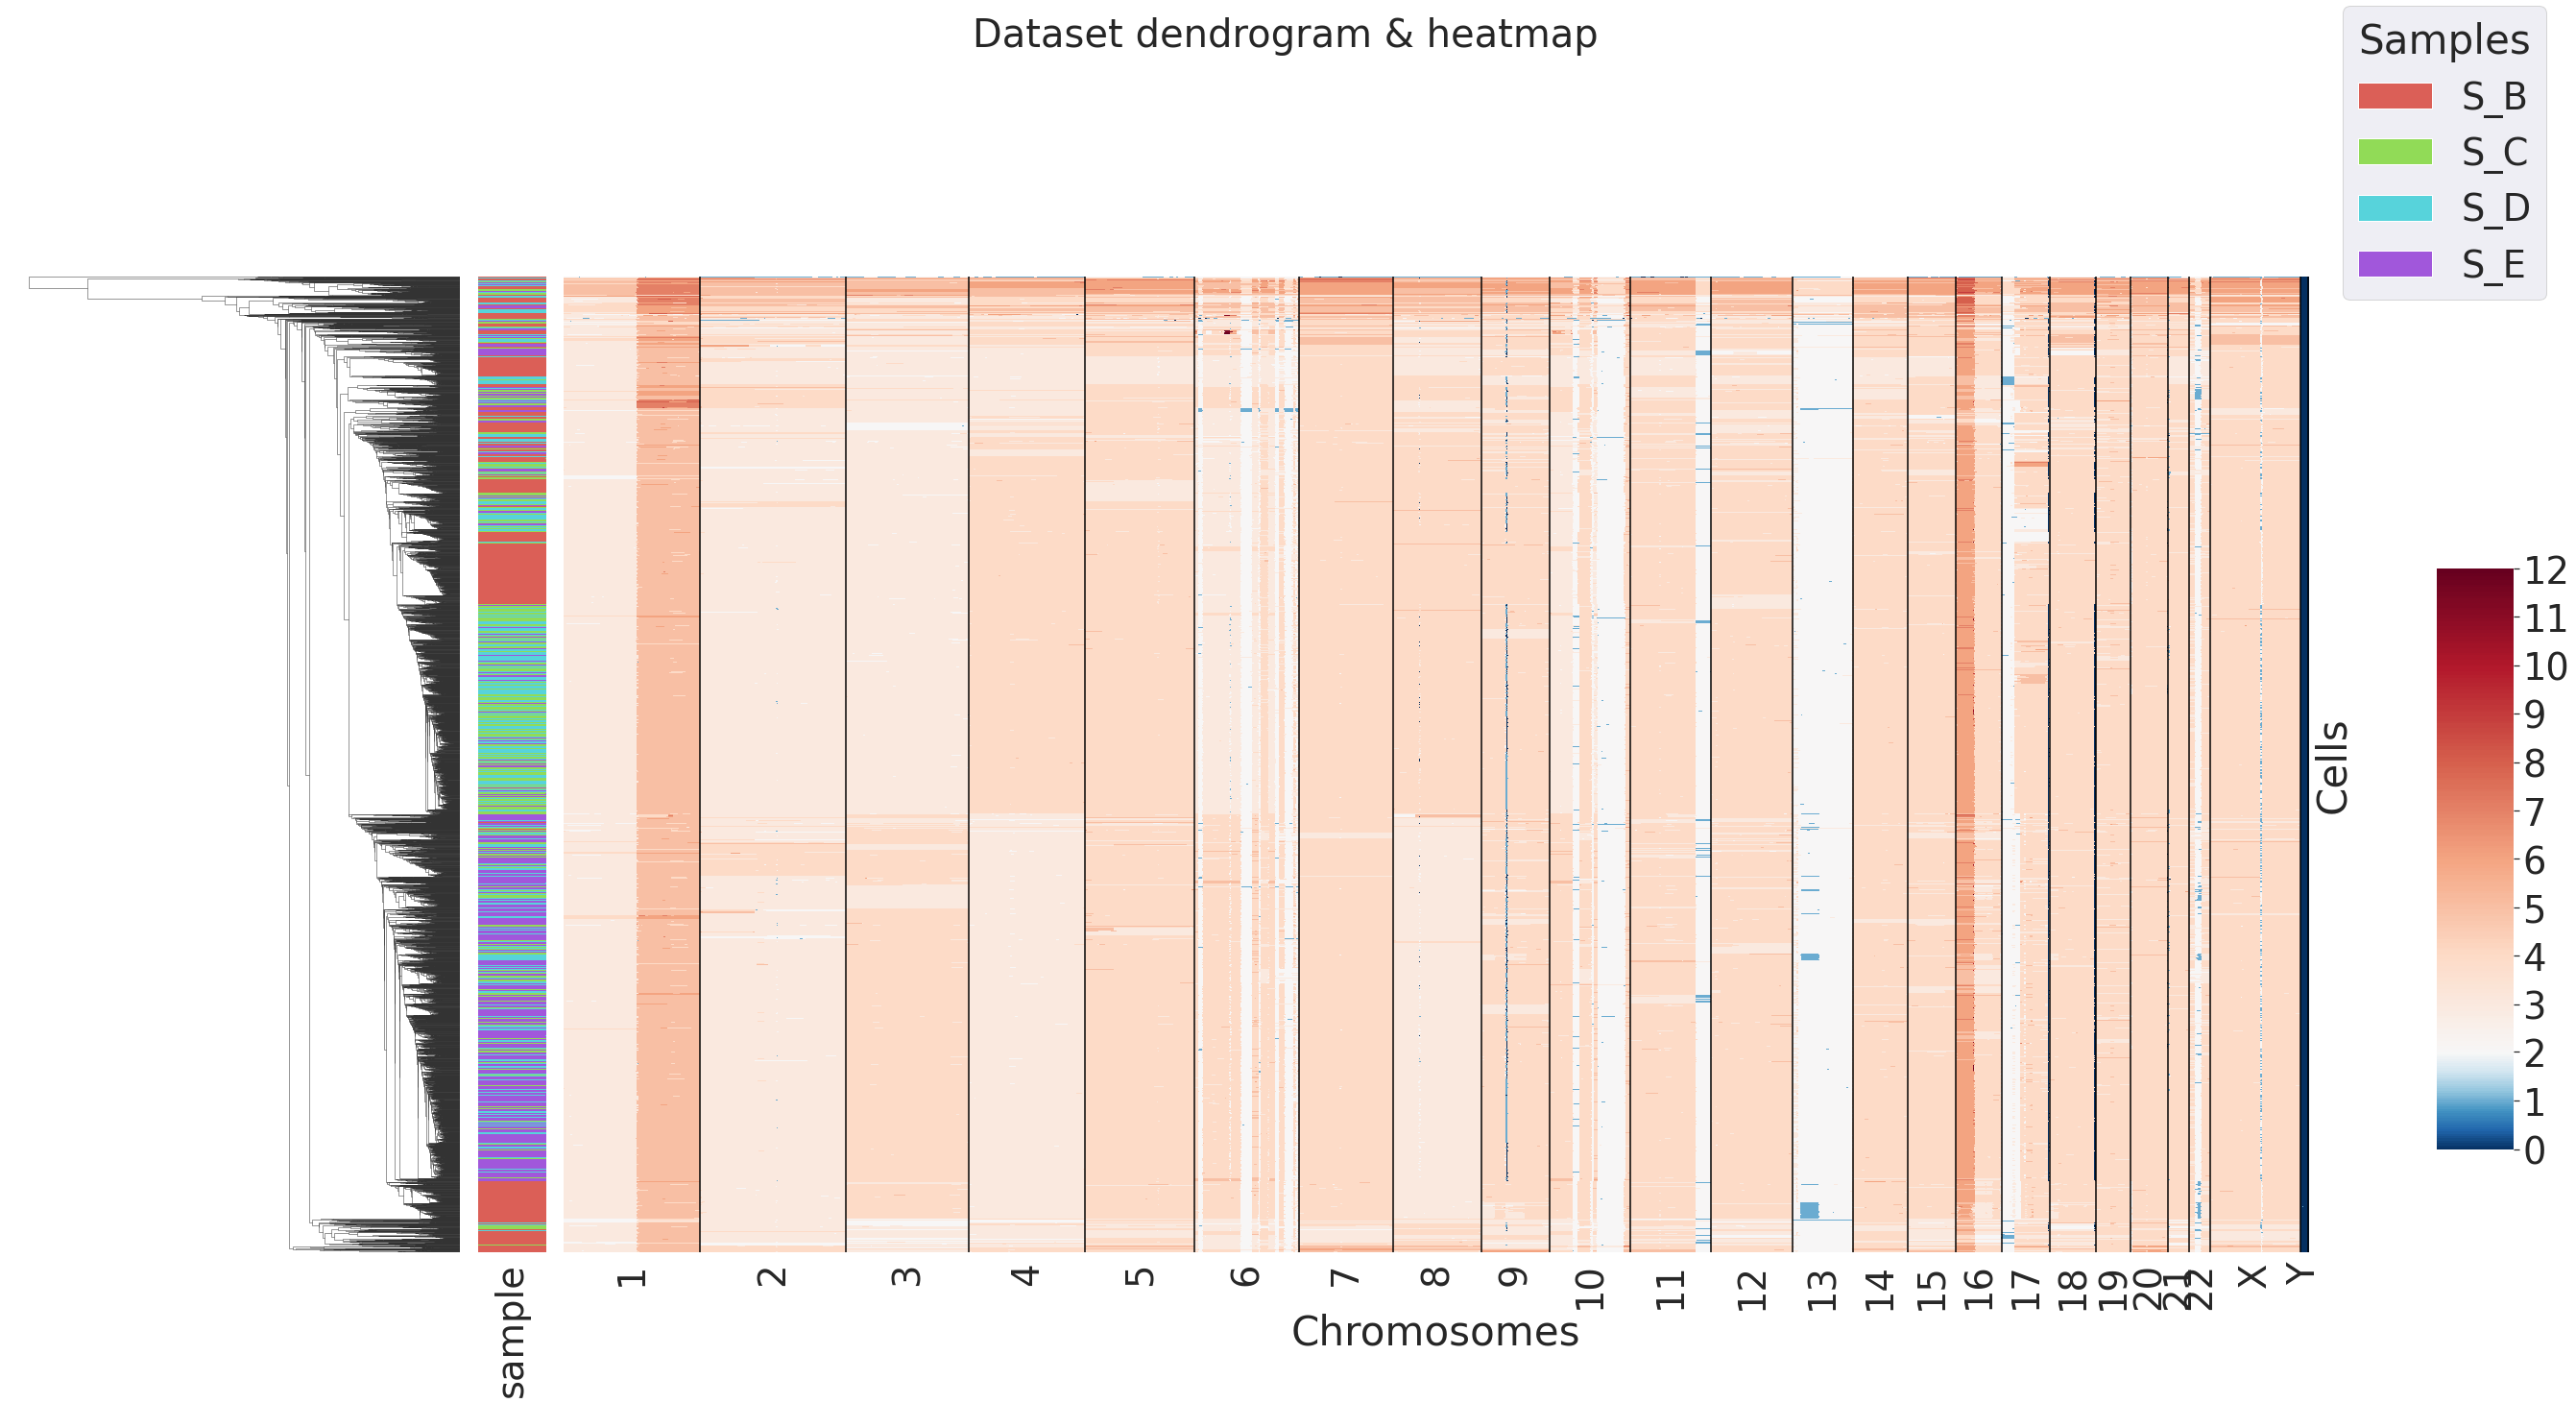

In [17]:
ss.plot_dendrogram()